In [6]:
#!pip install torchvision

In [7]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader #데이터를 특정 길이로 읽어오기
import torch.nn as nn
import matplotlib.pyplot as plt
import random
import torch.optim as optim

In [8]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기 사용:", device)

False
다음 기기 사용: cpu


In [9]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777) #모든 seed를 777로 고정 

In [10]:
epochs = 30
batch_size = 100

In [11]:
mnist_train = dsets.MNIST(root='MNIST_data/',  #root는 데이터의 저장 위치
                          train=True, #train은 이 데이터가 학습용인지 테스트용인지
                          transform=transforms.ToTensor(), #transforms는 현재 데이터를 파이토치 텐서로 변환
                          download=True) #데이터가 없을 경우 다운로드
mnist_test = dsets.MNIST(root='MNIST_data/', #test 데이터
                            train=False, 
                            transform=transforms.ToTensor(), 
                            download=True)     
              

In [12]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [13]:
data_loader = DataLoader(dataset=mnist_train, #데이터를 불러오는 함수
                        batch_size=batch_size, #한번에 불러오는 데이터의 양
                        shuffle=True, #데이터를 섞을지 여부
                        drop_last=True) #마지막 데이터를 버릴지 여부

In [14]:
for x, y in data_loader:
    print(x.size(), y.size()) #x는 이미지, y는 레이블

torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([100, 1, 28, 28]) torch.Size([100])
torch.Size([1

In [15]:
print(len(data_loader)) #600번의 배치가 있음


600


In [16]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #OMP error 해결

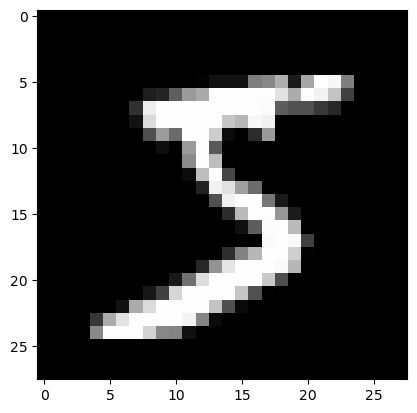

In [17]:
import matplotlib.pyplot as plt #이미지를 출력하기 위한 라이브러리
plt.imshow(mnist_train.data[0].view(28, 28), cmap='gray')
plt.show()


In [19]:
print(mnist_train.targets[1])

tensor(0)


In [20]:
model=nn.Linear(784, 10, bias=True).to(device) #input 784, output 10
criterion = nn.CrossEntropyLoss().to(device) #loss function
optimizer = optim.SGD(model.parameters(), lr=0.1) #optimizer

In [21]:
list(model.parameters()) #weight와 bias 출력
# 열 10개, 행 784개, bias 10개

[Parameter containing:
 tensor([[ 2.7237e-02,  2.7221e-02,  1.6018e-02,  ...,  2.0005e-02,
          -2.4505e-02,  1.1644e-02],
         [-3.8575e-03,  2.9399e-02,  7.4099e-03,  ..., -2.9822e-02,
           7.4010e-05,  2.6787e-02],
         [ 3.0080e-02, -2.1328e-02,  6.5948e-03,  ..., -1.5580e-02,
           3.3823e-02,  1.7100e-02],
         ...,
         [ 2.2515e-03,  1.1732e-02,  2.0664e-02,  ..., -1.2429e-02,
          -1.0554e-02, -8.9825e-03],
         [-1.2693e-02, -8.0397e-03,  2.9975e-02,  ...,  7.1139e-03,
           2.5636e-02,  3.3242e-02],
         [-2.7865e-02,  5.3291e-03,  1.4840e-03,  ..., -2.2437e-02,
           1.7010e-02, -2.8653e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.0111,  0.0345,  0.0230,  0.0343,  0.0262, -0.0135,  0.0185,  0.0145,
          0.0128, -0.0055], requires_grad=True)]

In [22]:
for epoch in range(epochs): #30번 반복. epoch는 전체 데이터셋을 한번 학습
    avg_cost=0 #cost의 평균
    total_batch = len(data_loader) #600 (데이터의 총 양)

    for x, y in data_loader: #600번 반복 -> 손실 함수 계산
        x = x.view(-1, 28 * 28).to(device) #28*28로 flatten. 2차원을 1차원으로 
        y = y.to(device) 

        optimizer.zero_grad()
        y_hat = model(x) #예측값 결과 가지고 cost 계산
        cost = criterion(y_hat, y) #예측값과 실제값 비교

        cost.backward() #backpropagation. cost를 최소화하는 방향으로 학습
        optimizer.step()
        avg_cost += cost / total_batch #cost의 평균 
    
    print('epoch', epoch, 'cost:', avg_cost.item()) 
print("Learning Finished!") 

# 데이터가 커지면 학습이 오래 걸림. 데이터를 나눠서 학습 -> mini batch

epoch 0 cost: 0.5355079174041748
epoch 1 cost: 0.3595496118068695
epoch 2 cost: 0.33130598068237305
epoch 3 cost: 0.31678104400634766
epoch 4 cost: 0.30744123458862305
epoch 5 cost: 0.300284743309021
epoch 6 cost: 0.2952483296394348
epoch 7 cost: 0.29064443707466125
epoch 8 cost: 0.2875213325023651
epoch 9 cost: 0.2845115661621094
epoch 10 cost: 0.2817974388599396
epoch 11 cost: 0.2796393930912018
epoch 12 cost: 0.27767354249954224
epoch 13 cost: 0.2760351002216339
epoch 14 cost: 0.27434873580932617
epoch 15 cost: 0.2729761600494385
epoch 16 cost: 0.2718455493450165
epoch 17 cost: 0.27043086290359497
epoch 18 cost: 0.2693321704864502
epoch 19 cost: 0.26823532581329346
epoch 20 cost: 0.26752808690071106
epoch 21 cost: 0.26652130484580994
epoch 22 cost: 0.2657320201396942
epoch 23 cost: 0.26465508341789246
epoch 24 cost: 0.263984352350235
epoch 25 cost: 0.26327088475227356
epoch 26 cost: 0.26239898800849915
epoch 27 cost: 0.2617510259151459
epoch 28 cost: 0.26112109422683716
epoch 29 cos